In [131]:
import os 
import numpy as np
import pandas as pd
from PIL import Image


## Cropping for tags

In [4]:
raw_img_dir = '/Users/hhchung/Data/workshop/zeiss_cv/raw_img/'
crop_dir = '/Users/hhchung/Data/workshop/zeiss_cv/crop_img/'

In [5]:

# 打開圖片
im = Image.open(crop_dir+'DSCN0445.JPG')


In [9]:
print(im.width)
print(im.height)

3648
2736


In [63]:
# 裁切圖片
width, height = im.size

crop_width, crop_height = width, height*0.4

left = 0
top = height - crop_height
right = crop_width
bottom = height
im_crop = im.crop((left, top, right, bottom))

# im_crop.show()



In [64]:
img_lst = os.listdir(crop_dir)

In [ ]:
# 裁切圖片
width, height = im.size

crop_width, crop_height = width, height*0.4

left = 0
top = height - crop_height
right = crop_width
bottom = height
im_crop = im.crop((left, top, right, bottom))

# im_crop.show()


In [65]:
for img in img_lst:
    im = Image.open(crop_dir + img)
    width, height = im.size
    crop_width, crop_height = width, height*0.4

    left, top, right, bottom = 0, height - crop_height, crop_width, height
    im_crop = im.crop((left, top, right, bottom))
    im_crop.save(crop_dir + img)


In [77]:
# im_crop.show()
import pytesseract
text = pytesseract.image_to_string(im_crop, lang='eng')
print(text)

## Cropping for trash

In [73]:
crop_trash_dir = '/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/'


im = Image.open(crop_trash_dir+'DSCN0445.JPG')



width, height = im.size

crop_width, crop_height = width, height*0.4

left = crop_width*0.15
right = crop_width*0.85

top = height*0.1
bottom = height*0.8
im_crop = im.crop((left, top, right, bottom))

im_crop.show()





In [74]:
trash_lst = os.listdir(crop_trash_dir)

for img in trash_lst:
    im = Image.open(crop_dir + img)
    width, height = im.size

    left = crop_width*0.15
    right = crop_width*0.85
    top = height*0.1
    bottom = height*0.8

    im_crop = im.crop((left, top, right, bottom))
    im_crop.save(crop_dir + img)

### Read imgage table

In [61]:
label_table = '/Users/hhchung/Data/workshop/zeiss_cv/Waste_recognition/Labels.xlsx'

In [85]:
data = pd.read_excel(label_table, index_col=None)  

In [86]:
data

,Verpackungs-ID,Packmittel-Verpackungsart,99 Sonstige Umverteilt nach Anzahl,Füllgut-Typ,Füllgut-Lebensmittelgruppe,Gesamtverpackung-Masse [g]
0,#103-100-1,5 Beutel (ringsum geschlossen),02 PP,1 Lebensmittel,9 Süßwaren,3.7
1,#103-10-1,2 Becher,05 PS,1 Lebensmittel,7 Milch u. Milchprodukt,9.8
2,#103-101-1,5 Beutel (ringsum geschlossen),14 2V Kunststoff+Aluminium,11 Nicht bestimmbar,14 Kein Lebensmittel,10.0
3,#103-102-1,16 Skinverpackung,03 LDPE,1 Lebensmittel,4 Fertiggericht,11.3
4,#103-103-1,5 Beutel (ringsum geschlossen),02 PP,1 Lebensmittel,9 Süßwaren,0.4
...,...,...,...,...,...,...
2970,#298-72-1,"8 Kartonverpackung (""TetraPak"")",13 2V Papier/Karton + Kunststoff,1 Lebensmittel,7 Milch u. Milchprodukt,42.2
2971,#298-73-1,"8 Kartonverpackung (""TetraPak"")",13 2V Papier/Karton + Kunststoff,1 Lebensmittel,7 Milch u. Milchprodukt,34.5
2972,#298-74-1,21 Restliche Kleinteile,18 Packstoff nicht bestimmbar,10 sonstiges,NaN,4.3
2973,#298-8-1,5 Beutel (ringsum geschlossen),02 PP,11 Nicht bestimmbar,14 Kein Lebensmittel,1.5


### Matching images and tags

In [167]:
real_ids = np.loadtxt('/Users/hhchung/Downloads/Match_ID.txt', 
                      dtype={'names': ('ids', 'data_path'),
                      'formats': ('U10', 'U24')}, 
                      unpack=True, 
                      usecols=[0, 1])

In [170]:
print(real_ids[0])
print(real_ids[1])
print(len(real_ids[0]))

['236-1' '236-1' '236-2' ... '103-118' '103-119' '103-119']
['crop_img/DSCN0046.JPG' 'crop_img/DSCN0047.JPG' 'crop_img/DSCN0050.JPG'
 ... 'crop_img/DSCN8818.JPG' 'crop_img/DSCN8819.JPG'
 'crop_img/DSCN8820.JPG']
1089


In [200]:
dict_match = {}
with open('/Users/hhchung/Downloads/Match_ID.txt', 'r') as f:
    for line in f:
#         print(line)
        items = line.split()
#         print(items[0])
#         print(items[0].split('-'))
        for ind, excel_item in enumerate(id_verpackungs):
            if items[0] in excel_item[0]:
                if len(items[0].split('-'))==2:
                    two_num_id = items[0]+'-'
                    if two_num_id in excel_item[0]:
                        print(items[0], excel_item, ind)
                        dict_match[items[1]] = [excel_item, items[0], ind, packmittel_verpackungsart_ls[ind][0]]
                elif len(items[0].split('-'))==3:
                    print(items[0], excel_item, ind)
                    dict_match[items[1]] = [excel_item, items[0], ind, packmittel_verpackungsart_ls[ind][0]]


236-1 ['#236-1-1'] 2521
236-1 ['#236-1-1'] 2521
236-2 ['#236-2-1'] 2533
236-2 ['#236-2-1'] 2533
236-3 ['#236-3-1'] 2544
236-3 ['#236-3-1'] 2544
236-4 ['#236-4-1'] 2555
236-4 ['#236-4-1'] 2555
236-5 ['#236-5-1'] 2566
236-5 ['#236-5-1'] 2566
236-6 ['#236-6-1'] 2573
236-6 ['#236-6-1'] 2573
236-7 ['#236-7-1'] 2574
236-3 ['#236-3-1'] 2544
236-8 ['#236-8-1'] 2575
236-8 ['#236-8-1'] 2575
236-9 ['#236-9-1'] 2576
236-9 ['#236-9-1'] 2576
236-10 ['#236-10-1'] 2520
236-10 ['#236-10-1'] 2520
236-11 ['#236-11-1'] 2522
236-12 ['#236-12-1'] 2523
236-12 ['#236-12-1'] 2523
236-13 ['#236-13-1'] 2524
236-13 ['#236-13-1'] 2524
236-14 ['#236-14-1'] 2525
236-14 ['#236-14-1'] 2525
236-15 ['#236-15-1'] 2526
236-16 ['#236-16-1'] 2527
236-17 ['#236-17-1'] 2528
236-18 ['#236-18-1'] 2529
236-18 ['#236-18-1'] 2529
236-19 ['#236-19-1'] 2530
236-19 ['#236-19-1'] 2530
236-20 ['#236-20-1'] 2531
236-20 ['#236-20-2'] 2532
236-20 ['#236-20-1'] 2531
236-20 ['#236-20-2'] 2532
236-21 ['#236-21-1'] 2534
236-21 ['#236-21-1'] 2

127-36 ['#127-36-1'] 568
127-37 ['#127-37-1'] 569
127-33 ['#127-33-1'] 565
127-33 ['#127-33-1'] 565
127-38 ['#127-38-1'] 570
233-1 ['#233-1-1'] 2251
233-2 ['#233-2-1'] 2262
233-3 ['#233-3-1'] 2274
233-4 ['#233-4-1'] 2285
233-5 ['#233-5-1'] 2299
233-6 ['#233-6-1'] 2310
233-7 ['#233-7-1'] 2321
233-8 ['#233-8-1'] 2332
233-9 ['#233-9-1'] 2343
233-10 ['#233-10-1'] 2250
233-11 ['#233-11-1'] 2252
233-12 ['#233-12-1'] 2253
233-13 ['#233-13-1'] 2254
233-14 ['#233-14-1'] 2255
233-15 ['#233-15-1'] 2256
233-16 ['#233-16-1'] 2257
233-17 ['#233-17-1'] 2258
233-18 ['#233-18-1'] 2259
233-21 ['#233-21-1'] 2263
233-22 ['#233-22-1'] 2264
233-23 ['#233-23-1'] 2265
233-24 ['#233-24-1'] 2266
233-26 ['#233-26-1'] 2268
233-26 ['#233-26-2'] 2269
233-27 ['#233-27-1'] 2270
233-28 ['#233-28-1'] 2271
233-29 ['#233-29-1'] 2272
233-30 ['#233-30-1'] 2273
233-31 ['#233-31-1'] 2275
233-32 ['#233-32-1'] 2276
233-40 ['#233-40-1'] 2284
233-41 ['#233-41-1'] 2286
233-47 ['#233-47-1'] 2295
233-47 ['#233-47-1'] 2295
233-48 ['

103-78 ['#103-78-1'] 96
103-79 ['#103-79-1'] 97
103-79 ['#103-79-1'] 97
103-80 ['#103-80-1'] 98
103-80 ['#103-80-1'] 98
103-81 ['#103-81-1'] 100
103-81 ['#103-81-1'] 100
103-82 ['#103-82-1'] 101
103-82 ['#103-82-1'] 101
103-83 ['#103-83-1'] 102
103-83 ['#103-83-1'] 102
103-84 ['#103-84-1'] 103
103-84 ['#103-84-1'] 103
103-85 ['#103-85-1'] 104
103-85 ['#103-85-1'] 104
103-86 ['#103-86-1'] 105
103-86 ['#103-86-1'] 105
103-87 ['#103-87-1'] 106
103-87 ['#103-87-1'] 106
103-88 ['#103-88-1'] 107
103-88 ['#103-88-1'] 107
103-89 ['#103-89-1'] 108
103-89 ['#103-89-1'] 108
103-89 ['#103-89-1'] 108
103-90 ['#103-90-1'] 109
103-90 ['#103-90-1'] 109
103-91 ['#103-91-1'] 111
103-91 ['#103-91-1'] 111
103-92 ['#103-92-1'] 112
103-92 ['#103-92-1'] 112
103-93 ['#103-93-1'] 113
103-93 ['#103-93-1'] 113
103-94 ['#103-94-1'] 114
103-94 ['#103-94-1'] 114
103-95 ['#103-95-1'] 115
103-95 ['#103-95-1'] 115
103-96 ['#103-96-1'] 116
103-96 ['#103-96-1'] 116
103-97 ['#103-97-1'] 117
103-97 ['#103-97-1'] 117
103-9

In [201]:
print(dict_match)

{'crop_img/DSCN0046.JPG': [array(['#236-1-1'], dtype=object), '236-1', 2521, '2'], 'crop_img/DSCN0047.JPG': [array(['#236-1-1'], dtype=object), '236-1', 2521, '2'], 'crop_img/DSCN0050.JPG': [array(['#236-2-1'], dtype=object), '236-2', 2533, '2'], 'crop_img/DSCN0051.JPG': [array(['#236-2-1'], dtype=object), '236-2', 2533, '2'], 'crop_img/DSCN0054.JPG': [array(['#236-3-1'], dtype=object), '236-3', 2544, '2'], 'crop_img/DSCN0055.JPG': [array(['#236-3-1'], dtype=object), '236-3', 2544, '2'], 'crop_img/DSCN0059.JPG': [array(['#236-4-1'], dtype=object), '236-4', 2555, '2'], 'crop_img/DSCN0060.JPG': [array(['#236-4-1'], dtype=object), '236-4', 2555, '2'], 'crop_img/DSCN0063.JPG': [array(['#236-5-1'], dtype=object), '236-5', 2566, '2'], 'crop_img/DSCN0064.JPG': [array(['#236-5-1'], dtype=object), '236-5', 2566, '2'], 'crop_img/DSCN0067.JPG': [array(['#236-6-1'], dtype=object), '236-6', 2573, '2'], 'crop_img/DSCN0068.JPG': [array(['#236-6-1'], dtype=object), '236-6', 2573, '2'], 'crop_img/DSCN0

In [208]:
pack_class = {}
for i, x in dict_match.items():
    print(i, x)
    if x[-1] in pack_class:
        pack_class[x[-1]] += 1
    else:
        pack_class[x[-1]] = 1

crop_img/DSCN0046.JPG [array(['#236-1-1'], dtype=object), '236-1', 2521, '2']
crop_img/DSCN0047.JPG [array(['#236-1-1'], dtype=object), '236-1', 2521, '2']
crop_img/DSCN0050.JPG [array(['#236-2-1'], dtype=object), '236-2', 2533, '2']
crop_img/DSCN0051.JPG [array(['#236-2-1'], dtype=object), '236-2', 2533, '2']
crop_img/DSCN0054.JPG [array(['#236-3-1'], dtype=object), '236-3', 2544, '2']
crop_img/DSCN0055.JPG [array(['#236-3-1'], dtype=object), '236-3', 2544, '2']
crop_img/DSCN0059.JPG [array(['#236-4-1'], dtype=object), '236-4', 2555, '2']
crop_img/DSCN0060.JPG [array(['#236-4-1'], dtype=object), '236-4', 2555, '2']
crop_img/DSCN0063.JPG [array(['#236-5-1'], dtype=object), '236-5', 2566, '2']
crop_img/DSCN0064.JPG [array(['#236-5-1'], dtype=object), '236-5', 2566, '2']
crop_img/DSCN0067.JPG [array(['#236-6-1'], dtype=object), '236-6', 2573, '2']
crop_img/DSCN0068.JPG [array(['#236-6-1'], dtype=object), '236-6', 2573, '2']
crop_img/DSCN0071.JPG [array(['#236-7-1'], dtype=object), '236-7

In [209]:
pack_class


{'2': 123,
 '8': 80,
 '9': 147,
 '7': 60,
 '10': 10,
 '5': 499,
 '13': 9,
 '16': 24,
 '6': 54,
 '20': 4,
 '17': 8,
 '1': 20,
 '19': 6,
 '11': 2,
 '14': 2,
 '12': 8}

In [211]:
count_other = 0
for key, item in pack_class.items():
    if key not in ['2', '9', '5']:
        count_other +=item
print(count_other)

287


In [221]:
record_dict = {}
new_pack_class = {}
for i, x in dict_match.items():
    print(i[9:], x)
    crop_trash_path = i[9:]
    print(crop_trash_path)
    if x[-1] not in ['2', '9', '5']:
        x[-1] = 'other'
    if x[-1] in new_pack_class:
        new_pack_class[x[-1]] += 1
        record_dict[x[-1]].append(crop_trash_path)
    else:
        new_pack_class[x[-1]] = 1
        record_dict[x[-1]] = [crop_trash_path]

#     for clas_itm in ['2', '9', '5', 'other']:
#         if 
    

DSCN0046.JPG [array(['#236-1-1'], dtype=object), '236-1', 2521, '2']
DSCN0046.JPG
DSCN0047.JPG [array(['#236-1-1'], dtype=object), '236-1', 2521, '2']
DSCN0047.JPG
DSCN0050.JPG [array(['#236-2-1'], dtype=object), '236-2', 2533, '2']
DSCN0050.JPG
DSCN0051.JPG [array(['#236-2-1'], dtype=object), '236-2', 2533, '2']
DSCN0051.JPG
DSCN0054.JPG [array(['#236-3-1'], dtype=object), '236-3', 2544, '2']
DSCN0054.JPG
DSCN0055.JPG [array(['#236-3-1'], dtype=object), '236-3', 2544, '2']
DSCN0055.JPG
DSCN0059.JPG [array(['#236-4-1'], dtype=object), '236-4', 2555, '2']
DSCN0059.JPG
DSCN0060.JPG [array(['#236-4-1'], dtype=object), '236-4', 2555, '2']
DSCN0060.JPG
DSCN0063.JPG [array(['#236-5-1'], dtype=object), '236-5', 2566, '2']
DSCN0063.JPG
DSCN0064.JPG [array(['#236-5-1'], dtype=object), '236-5', 2566, '2']
DSCN0064.JPG
DSCN0067.JPG [array(['#236-6-1'], dtype=object), '236-6', 2573, '2']
DSCN0067.JPG
DSCN0068.JPG [array(['#236-6-1'], dtype=object), '236-6', 2573, '2']
DSCN0068.JPG
DSCN0071.JPG [ar

In [213]:
new_pack_class

{'2': 123, 'other': 287, '9': 147, '5': 499}

In [222]:
record_dict

{'2': ['DSCN0046.JPG',
  'DSCN0047.JPG',
  'DSCN0050.JPG',
  'DSCN0051.JPG',
  'DSCN0054.JPG',
  'DSCN0055.JPG',
  'DSCN0059.JPG',
  'DSCN0060.JPG',
  'DSCN0063.JPG',
  'DSCN0064.JPG',
  'DSCN0067.JPG',
  'DSCN0068.JPG',
  'DSCN0071.JPG',
  'DSCN0072.JPG',
  'DSCN0075.JPG',
  'DSCN0076.JPG',
  'DSCN0079.JPG',
  'DSCN0080.JPG',
  'DSCN0083.JPG',
  'DSCN0084.JPG',
  'DSCN0086.JPG',
  'DSCN0088.JPG',
  'DSCN0089.JPG',
  'DSCN0459.JPG',
  'DSCN0460.JPG',
  'DSCN0461.JPG',
  'DSCN1026.JPG',
  'DSCN1027.JPG',
  'DSCN1028.JPG',
  'DSCN1029.JPG',
  'DSCN1030.JPG',
  'DSCN1031.JPG',
  'DSCN1032.JPG',
  'DSCN1033.JPG',
  'DSCN1034.JPG',
  'DSCN1035.JPG',
  'DSCN1179.JPG',
  'DSCN1180.JPG',
  'DSCN1181.JPG',
  'DSCN1182.JPG',
  'DSCN1183.JPG',
  'DSCN1184.JPG',
  'DSCN3750.JPG',
  'DSCN3751.JPG',
  'DSCN3752.JPG',
  'DSCN3753.JPG',
  'DSCN5347.JPG',
  'DSCN5349.JPG',
  'DSCN5352.JPG',
  'DSCN5354.JPG',
  'DSCN5356.JPG',
  'DSCN5482.JPG',
  'DSCN5483.JPG',
  'DSCN5485.JPG',
  'DSCN5487.JPG',
  'DS

cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0091.JPG /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/train/other/
cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0092.JPG /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/train/other/
cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0093.JPG /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/train/other/
cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0094.JPG /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/train/other/
cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0095.JPG /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/train/other/
cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0096.JPG /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/train/other/
cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0097.JPG /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/train/other/
cp /Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash

### plot accuracy

In [246]:
#  | Seen: 1792 | Loss: 0.8419 | Val Acc: 0.421
#  | Seen: 3584 | Loss: 0.5583 | Val Acc: 0.596
#  | Seen: 5376 | Loss: 0.3709 | Val Acc: 0.614
#  | Seen: 7168 | Loss: 0.288 | Val Acc: 0.649
#  | Seen: 8960 | Loss: 0.2579 | Val Acc: 0.684
#  | Seen: 10752 | Loss: 0.2709 | Val Acc: 0.684
import matplotlib.pyplot as plt

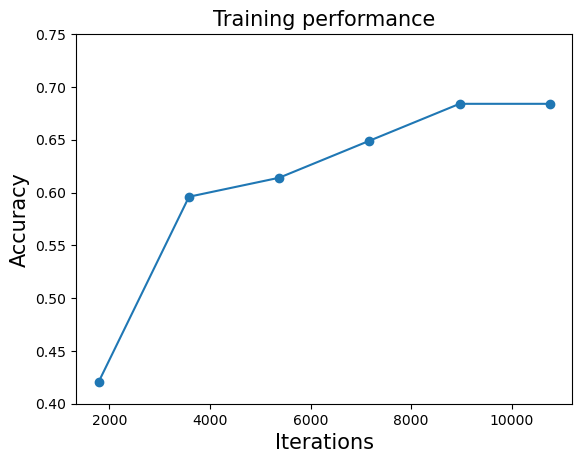

In [253]:
acc_lst = [0.421, 0.596, 0.614, 0.649, 0.684, 0.684]
x_itr = [1792, 3584, 5376, 7168, 8960, 10752]

plt.scatter(x_itr, acc_lst)
plt.plot(x_itr, acc_lst)

plt.ylim(0.4, 0.75)
plt.title('Training performance', fontsize=15)
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.show()



In [233]:
import shutil

src_path = '/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/' + 'DSCN0046.JPG'
dst_path = '/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/' + 'DSCN0046.JPG'
shutil.copyfile(src_path, dst_path)


'/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0046.JPG'

In [244]:

for key in record_dict:
    print(key)
    src_dir = '/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/'
    dst_dir = ''
    if key == '2':
        dst_dir = '/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/'
    elif key == '5':
        dst_dir = '/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/'
    elif key == '9':
        dst_dir = '/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/'
    elif key == 'other':
        dst_dir = '/Users/hhchung/Data/workshop/zeiss_cv/train/other/'

    for x in record_dict[key]:
        src_path = src_dir + x
        dst_path = dst_dir + x

#         shutil.copyfile(src_path, dst_path)

        print(src_path)
        print(dst_path)
        print()
        
        
        try: 
            img = Image.open(src_path)
            w, h = img.size
            
            if w > h:
                w_dst = 1024
                h_dst = int(h / w * 1024)
            else:
                h_dst = 1024
                w_dst = int(w / h * 1024)


            img = img.resize((w_dst, h_dst), resample=Image.BILINEAR)
            img.save(dst_path)

        
        except:
            continue


2
/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0046.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0046.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0047.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0047.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0050.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0050.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0051.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0051.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0054.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0054.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0055.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0055.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0059.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN0059.JPG

/Users/hhchung/Data/workshop/zeiss_cv/c

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6332.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN6332.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6334.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN6334.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7087.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN7087.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7088.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN7088.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7090.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN7090.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7091.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN7091.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7094.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN7094.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8572.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN8572.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8614.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN8614.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8615.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/cup_Becher_2/DSCN8615.JPG

other
/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0091.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN0091.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0092.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN0092.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0093.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN0093.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0094.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN0094.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0095.J

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1051.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN1051.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1053.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN1053.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1054.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN1054.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1055.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN1055.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1056.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN1056.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1057.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN1057.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1059.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN1059.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1060.JPG
/Users/hhchung/Data/work

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6279.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN6279.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6280.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN6280.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6284.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN6284.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6285.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN6285.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6300.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN6300.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6301.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN6301.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6302.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN6302.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6304.JPG
/Users/hhchung/Data/work

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7480.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN7480.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7482.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN7482.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7498.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN7498.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7502.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN7502.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7612.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN7612.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7627.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN7627.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7666.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN7666.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7669.JPG
/Users/hhchung/Data/work

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8430.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN8430.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8431.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN8431.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8432.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN8432.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8435.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN8435.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8436.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN8436.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8438.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN8438.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8598.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/other/DSCN8598.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8599.JPG
/Users/hhchung/Data/work

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1039.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN1039.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1040.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN1040.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1042.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN1042.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1043.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN1043.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1044.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN1044.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1045.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN1045.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1046.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN1046.JPG

/Users/hhchung/Data/workshop/zeiss

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6293.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN6293.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6294.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN6294.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6295.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN6295.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6296.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN6296.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6297.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN6297.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6298.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN6298.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6299.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bowl_Schale_9/DSCN6299.JPG

/Users/hhchung/Data/workshop/zeiss

5
/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0124.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0124.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0125.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0125.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0127.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0127.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0128.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0128.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0129.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0129.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0130.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0130.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0132.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0132.JPG

/Users/hhchung/Data/workshop/zeiss_cv/c

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0484.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0484.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0485.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0485.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0486.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0486.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0487.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0487.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0490.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0490.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0497.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0497.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0498.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0498.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0971.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0971.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0974.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0974.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0975.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0975.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0976.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0976.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0977.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0977.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0978.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0978.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN0979.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN0979.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1126.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN1126.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN1128.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN1128.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN5341.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN5341.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN5342.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN5342.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN5387.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN5387.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN5388.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN5388.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN5389.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN5389.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6370.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN6370.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6372.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN6372.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6373.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN6373.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6374.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN6374.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6375.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN6375.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6382.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN6382.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN6383.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN6383.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7056.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN7056.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7057.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN7057.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7058.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN7058.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7415.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN7415.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7419.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN7419.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7420.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN7420.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN7421.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN7421.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8283.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8283.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8284.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8284.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8285.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8285.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8286.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8286.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8287.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8287.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8290.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8290.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8291.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8291.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8354.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8354.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8359.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8359.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8360.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8360.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8367.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8367.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8389.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8389.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8439.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8439.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8440.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8440.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8793.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8793.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8794.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8794.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8795.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8795.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8796.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8796.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8797.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8797.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8798.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8798.JPG

/Users/hhchung/Data/workshop/zeiss_cv/crop_img_trash/DSCN8799.JPG
/Users/hhchung/Data/workshop/zeiss_cv/train/bag_Beutel_5/DSCN8799.JPG

/Users/hhchung/Data/workshop/zeiss_cv/cro

### ID

In [103]:
id_verpackungs = data.iloc[:,[0]].to_numpy()

In [104]:
id_verpackungs

array([['#103-100-1'],
       ['#103-10-1'],
       ['#103-101-1'],
       ...,
       ['#298-74-1'],
       ['#298-8-1'],
       ['#298-9-1']], dtype=object)

In [111]:
id_verpackung_ls = [id_verpackung[0][1:].split('-') for id_verpackung in id_verpackungs]

In [178]:
id_verpackung_ls

[['103', '100', '1'],
 ['103', '10', '1'],
 ['103', '101', '1'],
 ['103', '102', '1'],
 ['103', '103', '1'],
 ['103', '104', '1'],
 ['103', '105', '1'],
 ['103', '106', '1'],
 ['103', '107', '1'],
 ['103', '108', '1'],
 ['103', '109', '1'],
 ['103', '1', '1'],
 ['103', '110', '1'],
 ['103', '11', '1'],
 ['103', '111', '1'],
 ['103', '112', '1'],
 ['103', '113', '1'],
 ['103', '114', '1'],
 ['103', '115', '1'],
 ['103', '116', '1'],
 ['103', '117', '1'],
 ['103', '118', '1'],
 ['103', '119', '1'],
 ['103', '120', '1'],
 ['103', '12', '1'],
 ['103', '13', '1'],
 ['103', '14', '1'],
 ['103', '15', '1'],
 ['103', '16', '1'],
 ['103', '17', '1'],
 ['103', '18', '1'],
 ['103', '19', '1'],
 ['103', '20', '1'],
 ['103', '2', '1'],
 ['103', '21', '1'],
 ['103', '22', '1'],
 ['103', '23', '1'],
 ['103', '24', '1'],
 ['103', '25', '1'],
 ['103', '26', '1'],
 ['103', '27', '1'],
 ['103', '28', '1'],
 ['103', '29', '1'],
 ['103', '30', '1'],
 ['103', '3', '1'],
 ['103', '31', '1'],
 ['103', '32', '

In [116]:
for x in id_verpackung_ls:
    if x[-1] != '1' and x[-1] != '2':
        print(x[-1])

3
3
4
5
6


### packmittel_verpackungsarts

In [124]:
packmittel_verpackungsarts = data.iloc[:,[1]].to_numpy()

In [125]:
packmittel_verpackungsarts

array([['5 Beutel (ringsum geschlossen)'],
       ['2 Becher'],
       ['5 Beutel (ringsum geschlossen)'],
       ...,
       ['21 Restliche Kleinteile'],
       ['5 Beutel (ringsum geschlossen)'],
       ['5 Beutel (ringsum geschlossen)']], dtype=object)

In [126]:
packmittel_verpackungsart_ls = [packmittel_verpackungsart[0].split(' ') for packmittel_verpackungsart in packmittel_verpackungsarts]


In [127]:
packmittel_verpackungsart_ls

[['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['2', 'Becher'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['16', 'Skinverpackung'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['4', 'Netz'],
 ['12', 'Tube'],
 ['2', 'Becher'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['11', 'Blister', '(Durchdrück-B.)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['5', 'Beutel', '(ringsum', 'geschlossen)'],
 ['21', 'Restliche', 'Kleinteile'],
 ['11', 'Blister', '(Durchdrück-B.)'],
 ['11', 

In [150]:
for i in range(23):
    for pack in packmittel_verpackungsart_ls:
#         print(pack[0], i)
        if int(pack[0]) == i:
            print(i, pack[1:])
            break

1 ['Flasche', '(Kunststoff)']
2 ['Becher']
3 ['Verschraubter', 'Tiegel']
4 ['Netz']
5 ['Beutel', '(ringsum', 'geschlossen)']
6 ['Tüte', '(mind.', '1', 'Seite', 'offen)']
7 ['Folie', 'flächig', '(KEIN', 'Beutel/Tüte)']
8 ['Kartonverpackung', '("TetraPak")']
9 ['Schale,', 'Tray']
10 ['Starre', 'Folie', '("Wiener-Würstchen-Verp.")']
11 ['Blister', '(Durchdrück-B.)']
12 ['Tube']
13 ['Dose', '(einschl.', 'Spraydose)']
14 ['Schachtel', '(Faltschachtel,', 'auch', 'Kunststoff-F.)']
15 ['Wickelverpackung']
16 ['Skinverpackung']
17 ['Füllmaterial']
18 ['Sonstiges', 'Verpackungselement', '(Displayschild...)']
19 ['separates', 'Verschlusselement', '(Deckel,', 'Clip…)']
20 ['Nichtverpackungs-Artikel']
21 ['Restliche', 'Kleinteile']


In [128]:
materials = data.iloc[:,[2]].to_numpy()

In [133]:
# material_ls = [material[0].split(' ') for material in materials if not np.isnan(material[0])]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [145]:
for material in materials:
#     print(material[0])
    if len(material[0]) < 1:
        print(material)
# material_ls = [material[0].split(' ') for material in materials ]


TypeError: object of type 'float' has no len()